In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [5]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(700, activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(400,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
dense (Dense)                (None, 700)               2151100   
_________________________________________________________________
batch_normalization_1 (Batch (None, 700)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               280400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 400)               1600      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               1

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
dense (Dense)                (None, 700)               2151100   
_________________________________________________________________
batch_normalization_1 (Batch (None, 700)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               280400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 400)               1600      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               1

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10.h5", #저장할 모델 이름
                                                monitor = 'val_loss', #monitoring 할 기준
                                                save_best_only=True) 

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # 이 떄에는 학습의 추이를 살펴보려고 val date를 추가하였다.

Epoch 1/100
1407/1407 [==============================] - 46s 33ms/step - loss: 1.7357 - accuracy: 0.3819 - val_loss: 1.5459 - val_accuracy: 0.4496
Epoch 2/100
1407/1407 [==============================] - 44s 32ms/step - loss: 1.5230 - accuracy: 0.4540 - val_loss: 1.4198 - val_accuracy: 0.4976
Epoch 3/100
1407/1407 [==============================] - 45s 32ms/step - loss: 1.4273 - accuracy: 0.4889 - val_loss: 1.3643 - val_accuracy: 0.5174
Epoch 4/100
1407/1407 [==============================] - 45s 32ms/step - loss: 1.3529 - accuracy: 0.5169 - val_loss: 1.3280 - val_accuracy: 0.5242
Epoch 5/100
1407/1407 [==============================] - 46s 33ms/step - loss: 1.2798 - accuracy: 0.5456 - val_loss: 1.2967 - val_accuracy: 0.5394
Epoch 6/100
1407/1407 [==============================] - 45s 32ms/step - loss: 1.2175 - accuracy: 0.5686 - val_loss: 1.3148 - val_accuracy: 0.5336
Epoch 7/100
1407/1407 [==============================] - 45s 32ms/step - loss: 1.1647 - accuracy: 0.5861 - val_loss: 1

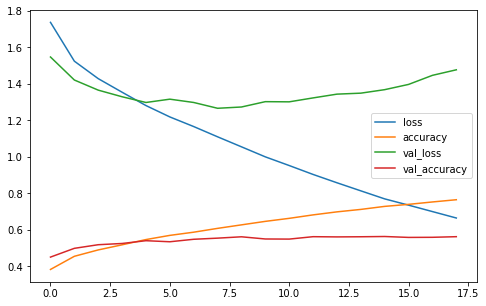

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [11]:
mse_test = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.2757 - accuracy: 0.5569


In [12]:
mse_test

[1.2756543159484863, 0.5569000244140625]